In [1]:
#%%
    #%matplotlib auto
%matplotlib qt

import matplotlib.pyplot as plt
import pyxdf
import numpy as np
import pandas as pd
from time import localtime, strftime
import mne
from mnelab.io.xdf import read_raw_xdf
import os
from autoreject import AutoReject, get_rejection_threshold

file_path = '/mnt/d/Florencia/Desktop/Facultad/Tesis/TesisFlor/Mediciones/S02_auditivo.xdf'
streams, header = pyxdf.load_xdf(file_path)


In [2]:
raw = read_raw_xdf(file_path, stream_ids=[1],preload=True)

Creating RawArray with float64 data, n_channels=24, n_times=674916
    Range : 0 ... 674915 =      0.000 ...  1349.811 secs
Ready.


In [3]:
channel_types = {
    'Fp1': 'eeg', 'Fp2': 'eeg', 
    'F3': 'eeg', 'F4': 'eeg', 
    'C3': 'eeg', 'C4': 'eeg', 
    'P3': 'eeg', 'P4': 'eeg', 
    'O1': 'eeg', 'O2': 'eeg', 
    'F7': 'eeg', 'F8': 'eeg', 
    'T7': 'eeg', 'T8': 'eeg', 
    'P7': 'eeg', 'P8': 'eeg', 
    'Fz': 'eeg', 'Cz': 'eeg', 
    'Pz': 'eeg', 'M1': 'eeg', 
    'M2': 'eeg', 'AFz': 'eeg', 
    'CPz': 'eeg', 'POz': 'eeg'}
raw.set_channel_types(channel_types)

/tmp/ipykernel_679/2055428644.py:14: RuntimeWarning: The unit for channel(s) AFz, C3, C4, CPz, Cz, F3, F4, F7, F8, Fp1, Fp2, Fz, M1, M2, O1, O2, P3, P4, P7, P8, POz, Pz, T7, T8 has changed from NA to V.
  raw.set_channel_types(channel_types)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,24 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.01 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [4]:
#%%

### Set montage ###
#dig_montage = mne.channels.read_custom_montage('./SMARTING_standard.elp')
raw1 = raw.set_montage('standard_1020')

#raw.plot_sensors(show_names=True)
#plt.show()

In [5]:
raw1.annotations

<Annotations | 1200 segments: 0 (400), 1 (400), 2 (400)>

In [6]:
#%%
##################################
########    2.FILTERING   ########
##################################

# band filters
hpass = 1
lpass = 45
raw_filtered = raw1.copy().filter(l_freq=hpass, h_freq=lpass, picks='eeg')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [7]:
raw_filtered.annotations

<Annotations | 1200 segments: 0 (400), 1 (400), 2 (400)>

In [8]:
#%%
#notch filter
raw_filtered = raw_filtered.notch_filter(np.arange(50, 250, 50) ) 

#raw_filtered.save(path + filtered_folder + participant + '.fif', overwrite = True)

#raw_filtered.plot_psd()


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz


- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


In [9]:
raw_filtered.annotations

<Annotations | 1200 segments: 0 (400), 1 (400), 2 (400)>

In [10]:
#%%

##################################
####   3.VISUAL INSPECTION   ######
##################################
# Filter annotations by description
filtered_annotations = mne.Annotations(onset=[],
                                        duration=[],
                                        description=[])

for ann in raw_filtered.annotations:
    if ann['description'] in ['1']:
        filtered_annotations.append(ann['onset'], ann['duration'], ann['description'])

raw_filtered.set_annotations(filtered_annotations)

events, event_id = mne.events_from_annotations(raw_filtered, event_id={'1': 1})

raw_filtered.plot(events=events,scalings='auto')
plt.show()

#report.add_raw(raw=raw_filtered, title='Filtered Raw', psd = True)


Used Annotations descriptions: ['1']


/tmp/ipykernel_679/2619930715.py:15: RuntimeWarning: Omitted 160 annotation(s) that were outside data range.
  raw_filtered.set_annotations(filtered_annotations)


Using matplotlib as 2D backend.


Channels marked as bad:
none


/tmp/ipykernel_679/9302579.py:17: RuntimeWarning: This filename (/mnt/d/Florencia/Desktop/Facultad/Tesis/TesisFlor/Analisis/S02_auditivo_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(path1, overwrite = True)


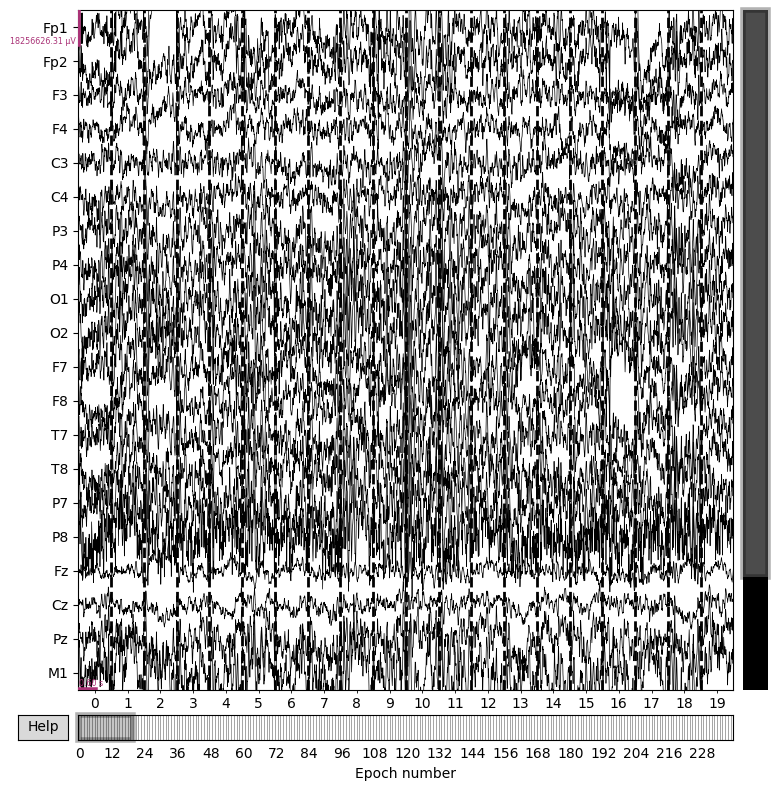

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [11]:
#%%

##################################
#########    4.EPOCHS   ##########
#################################


tmin = -0.7
tmax = 0.5
baseline = (-.7,-.5)
epochs = mne.Epochs(raw_filtered, events = events, event_id= event_id, baseline = baseline ,
                        tmin = tmin, tmax = tmax, picks = ('eeg'), preload = True,
                        verbose = False)

path1='/mnt/d/Florencia/Desktop/Facultad/Tesis/TesisFlor/Analisis/S02_auditivo_epochs.fif'

epochs.save(path1, overwrite = True)
#report.add_epochs(epochs=epochs, title='Epochs')

epochs.plot(scalings = 'auto')


/home/florencia/laboDeDatos/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running autoreject on ch_type=eeg


100%|██████████| Creating augmented epochs : 24/24 [00:08<00:00,    2.91it/s]
100%|██████████| Computing thresholds ... : 24/24 [01:06<00:00,    2.77s/it]
















































































































































































































































100%|██████████| Repairing epochs : 240/240 [00:05<00:00,   40.83it/s]

















































































































































































































































100%|██████████| Repairing epochs : 240/240 [00:10<00:00,   22.73it/s]






















100%|██████████| Fold : 10/10 [00:05<00:00,    1.95it/s]





















































































































































Estimated consensus=0.30 and n_interpolate=4



















































































































































































































































100%|██████████| Repairing epochs : 240/240 [00:09<00:00,   26.49it/s]

Dropped 32 epochs: 2, 9, 10, 22, 34, 35, 42, 54, 55, 64, 65, 96, 101, 104, 108, 112, 113, 123, 130, 132, 147, 148, 151, 156, 158, 160, 176, 177, 178, 187, 192, 216


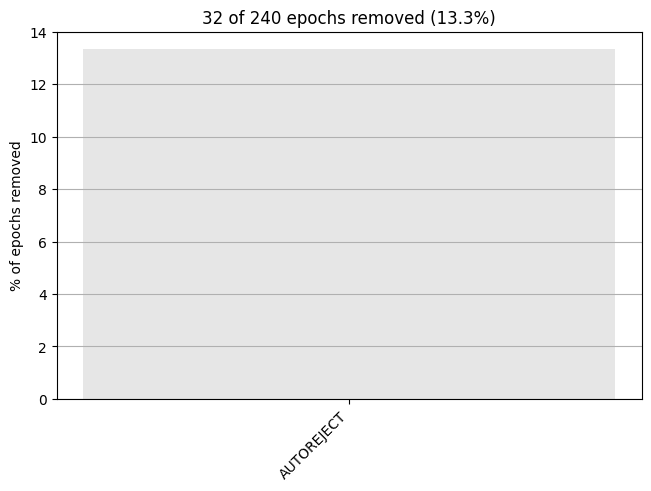

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [12]:
#%%
##################################
######    REJECT EPOCHS   ########
##################################

### Autoreject algorithm for rejecting epochs ###
ar = AutoReject(thresh_method = 'bayesian_optimization', random_state=42)
epochs_clean, reject_log = ar.fit_transform(epochs, return_log=True)  
# reject = get_rejection_threshold(epochs)  

# reject_log.plot_epochs(epochs, scalings='auto')

### Manual rejection ###
epochs_clean.plot(scalings = 'auto')
plt.show()


epochs_clean.plot_drop_log()

# report.add_epochs(epochs=epochs_clean, title='Epochs clean', psd = False)
# epochs_clean.save(path + epochs_rej_folder + participant + '.fif', overwrite = True)


In [13]:
#%%
##################################
######   ICA  ########
##################################

n_components = 0.99  # Should normally be higher, like 0.999!!
method = 'fastica'
max_iter = 512  # Should normally be higher, like 500 or even 1000!!
fit_params = dict(fastica_it=5)
random_state = 42

ica = mne.preprocessing.ICA(n_components=n_components,
                            method=method,
                            max_iter=max_iter,
#                             fit_params=fit_params,
                            random_state=random_state)

ica.fit(epochs_clean)

# create epochs based on EOG events, find EOG artifacts in the data via pattern
# matching, and exclude the EOG-related ICA components
eog_epochs = mne.preprocessing.create_eog_epochs(raw=raw_filtered, ch_name = 'Fp1')
eog_components, eog_scores = ica.find_bads_eog(
     inst=eog_epochs,
     ch_name='Fp1',  # a channel close to the eye
     threshold=1  # lower than the default threshold
)
ica.exclude = eog_components


# ica.plot_components(inst = epochs_clean,picks=range(15))

ica.plot_sources(epochs_clean, block=True, show = True, )
plt.show()

#report.add_ica(ica, title = 'ICA', inst = epochs_clean)
epochs_ica = ica.apply(inst = epochs_clean)





Fitting ICA to data using 24 channels (please be patient, this may take a while)


/tmp/ipykernel_679/1265581240.py:18: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs_clean)


Selecting by explained variance: 16 components
Fitting ICA took 6.9s.
Using EOG channel: Fp1
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel Fp1 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5001 samples (10.002 s)

Now detecting blinks and generating corresponding events
Found 43 significant peaks
Number of EOG events detected: 43
Not setting metadata
43 matching events found
No baseline correction applied
Using data from preloaded Raw for 43 events and 501 original t

/tmp/ipykernel_679/1265581240.py:37: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_ica = ica.apply(inst = epochs_clean)


In [14]:
### Manual rejection ###
epochs_ica.plot(scalings = 'auto')
plt.show()


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


In [15]:
#%%
##################################
######   Interpolate chs  ########
##################################
id = 'S02'

raw_folder = 'raw/'
filtered_folder = 'filtered/'
epoched_folder = 'epoched/'
epochs_rej_folder = 'epochs_rejected/'
interpolated_folder = 'interpolated/'
rereferenced_folder = 'rereferenced/'
reports_fodler = 'reports/'

path = '/mnt/d/Florencia/Desktop/Facultad/Tesis/TesisFlor/Mediciones/'
estimulo = 'auditivo'

epochs_interpolate = epochs_ica.copy().interpolate_bads()
epochs_interpolate.save(path + interpolated_folder + id + estimulo + '.fif', overwrite = True)

##################################
#######    Rereference   #########
##################################
epochs_rereferenced, ref_data = mne.set_eeg_reference(inst = epochs_interpolate, ref_channels = 'average', copy = True)
#epochs_rereferenced.save(path + rereferenced_folder + participant + '.fif', overwrite = True)

#report.add_epochs(epochs=epochs_rereferenced, title='Epochs interpolated and rereferenced', psd = False)

#report.save(path + reports_fodler + f'report_{id}_{round}.html', overwrite=True)


Setting channel interpolation method to {'eeg': 'spline'}.


/tmp/ipykernel_679/2756172334.py:18: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epochs_interpolate = epochs_ica.copy().interpolate_bads()
/tmp/ipykernel_679/2756172334.py:19: RuntimeWarning: This filename (/mnt/d/Florencia/Desktop/Facultad/Tesis/TesisFlor/Mediciones/interpolated/S02auditivo.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_interpolate.save(path + interpolated_folder + id + estimulo + '.fif', overwrite = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
